## Observations and Insights 

In [49]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
conc_data = pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')
# Display the data table for preview
conc_data.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [78]:
# Checking the number of mice.
len(conc_data['Mouse ID'].unique())

249

In [90]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
conc_data[conc_data.duplicated(['Mouse ID'], keep = False)] 
#conc_data.groupby(['Mouse ID']).count().sort_values(['Drug Regimen'])

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [48]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
concat_data = conc_data.drop_duplicates('Mouse ID')
concat_data.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
50,s508,Ramicane,Male,1,17,0,45.0,0
60,f966,Capomulin,Male,16,17,0,45.0,0
65,m546,Ramicane,Male,18,16,0,45.0,0
75,z578,Ramicane,Male,11,16,0,45.0,0
85,j913,Ramicane,Female,4,17,0,45.0,0


In [28]:
# Checking the number of mice in the clean DataFrame.
len(concat_data)

249

## Summary Statistics

In [110]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_mean = conc_data.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
drug_median = conc_data.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
drug_var = conc_data.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
drug_std = conc_data.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
drug_sem = conc_data.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']
pd.DataFrame({'Mean': drug_mean, 'Median': drug_median, 'Variance': drug_var,
               'Standard Deviation': drug_std, 'SEM': drug_sem})


50.448380631336505
48.95147442
79.07427999025795
8.892372011463417
0.20443585034961514


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [119]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
conc_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:>

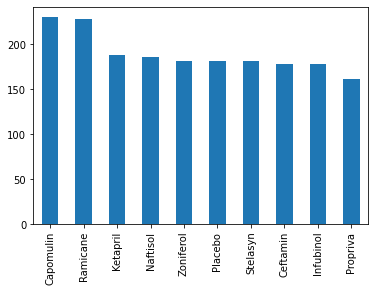

In [123]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_counts = conc_data['Drug Regimen'].value_counts()

drug_counts.plot(kind = 'bar')

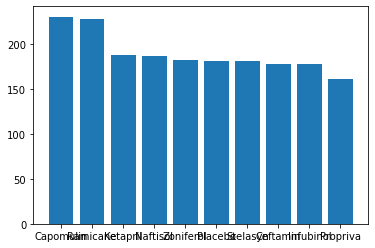

In [128]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.bar(drug_counts.index, drug_counts)
plt.show()

<AxesSubplot:ylabel='Sex'>

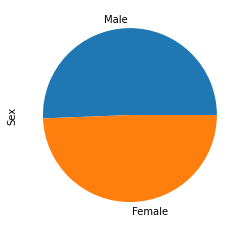

In [131]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_count = conc_data['Sex'].value_counts()
sex_count
sex_count.plot(kind = 'pie')


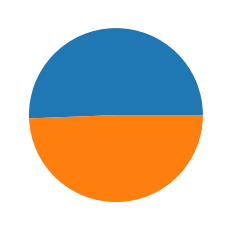

In [133]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_count)
plt.show()


## Quartiles, Outliers and Boxplots

In [137]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
conc_data.sort_values('Timepoint').groupby(['Drug Regimen']).last()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,i738,Female,23,20,45,37.311846,2
Ceftamin,x581,Female,19,28,45,64.634949,3
Infubinol,c139,Male,11,28,45,72.226731,2
Ketapril,c832,Male,18,29,45,65.415955,3
Naftisol,z969,Male,9,30,45,73.867845,4
Placebo,c757,Male,9,27,45,69.042841,3
Propriva,w350,Male,7,26,45,64.957562,2
Ramicane,a644,Female,7,17,45,32.978522,1
Stelasyn,c402,Female,1,27,45,74.040390,3


In [169]:
# Put treatments into a list for for loop (and later for plot labels)
treats = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for t in treats:
    filtered_data = conc_data[conc_data['Drug Regimen'] == t]['Tumor Volume (mm3)']
    quartiles = conc_data[conc_data['Drug Regimen'] == t]['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"{t} IQR: {round(iqr,2)}")

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = filtered_data[(filtered_data > upper_bound) | (filtered_data < lower_bound)]
    print(outliers)

Capomulin IQR: 7.31
18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane IQR: 8.33
9    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol IQR: 10.0
Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin IQR: 9.59
Series([], Name: Tumor Volume (mm3), dtype: float64)


In [162]:
type(quartiles)

pandas.core.series.Series

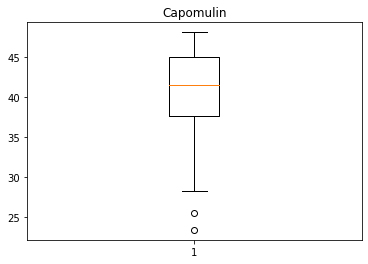

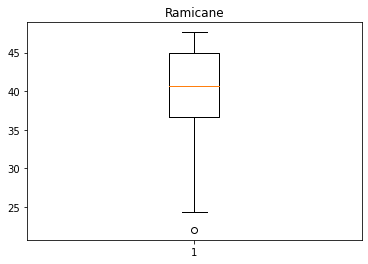

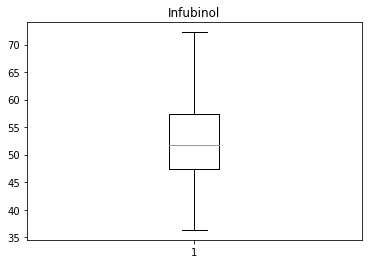

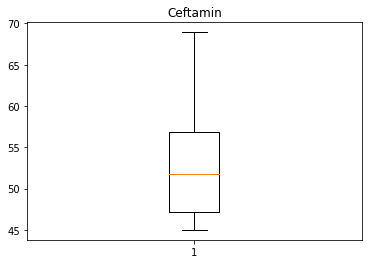

In [174]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
for t in treats:
    filtered_data = conc_data[conc_data['Drug Regimen'] == t]['Tumor Volume (mm3)']
    plt.boxplot(filtered_data)
    plt.title(t)
    plt.show()

## Line and Scatter Plots

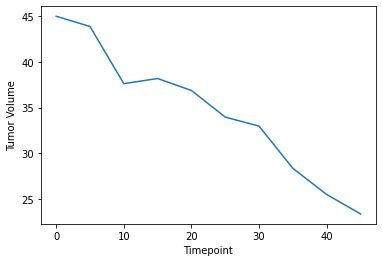

In [179]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
conc_data[conc_data['Drug Regimen'] == 'Capomulin']
mouse = conc_data[conc_data['Mouse ID'] == 's185']
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'])
plt.ylabel('Tumor Volume')
plt.xlabel('Timepoint')
plt.show()


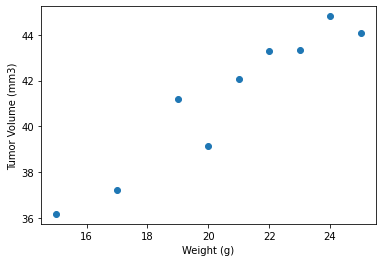

In [186]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_reg = conc_data[conc_data['Drug Regimen'] == 'Capomulin']
weights = cap_reg.groupby(['Weight (g)']).mean()
plt.scatter(weights.index, weights['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

(0.9505243961855269, 8.449451040646294e-05)
0.894772609734063 22.764229983591896


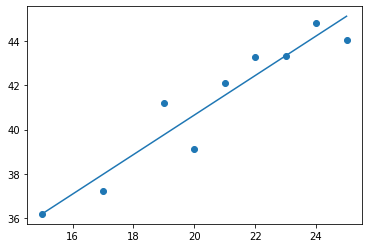

In [194]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(weights.index, weights['Tumor Volume (mm3)'])
print(correlation)
slope, intercept, r_value, p_value, std_err = st.linregress(weights.index, weights['Tumor Volume (mm3)'])
print(slope, intercept)
plt.plot(weights.index, intercept + slope*weights.index)
plt.scatter(weights.index, weights['Tumor Volume (mm3)'])
plt.show()